## HW 4

__Выполнила Шарыпина Даша, группа 6382__

In [1]:
import numpy as np
from numpy.linalg import norm

from cvxopt import solvers, matrix, sparse
solvers.options['show_progress'] = False
solvers.options['feastol'] = 10**(-10)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(7, 7)

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Задание 3

<img src="hw4_pic.png">

Пусть Игра 1 является игрой с нулевой суммой: $a = -b$, $c = -d$ и т.д., а выигрыши игрока $P_1$ равны:

| a | c | e | g | i | k | m | p |
|---|---|---|---|---|---|---|---|
|10 |-11|-8 |14 |1  |2  |3  |0  |

Найти равновесные смешанные стратегии, а также цену игры с помощью решения пары задач линейного программирования для игры в секвенциальной форме (используя библиотеку `cvxopt`)

-------

__Решение с помощью `cvxopt`__


Пара задач линейного программирования:

$$\underset{x, q}{\max} -f^T q$$
$$s.t.\quad A^Tx + F^T q \geq 0, Ex = e$$
$$x \geq 0$$


$$\underset{y, p}{\min}e^Tp$$
$$s.t. \quad -Ay + E^T p \geq 0, Fy = f$$
$$y \geq 0$$

-----------------

Для первого игрока:

\begin{equation}
A = 
    \begin{bmatrix}
        0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 1 & 2 & 3\\
        0 & 0 & 0 & 0 & 0 & 0\\
        0 & 10 & -8 & 0 & 0 & 0\\
        0 & -11 & 14 & 0 & 0 & 0
    \end{bmatrix}
\end{equation}

План реализаций

| № | $S_1$ | |
|---|-------|-|
|0| $()$ | 1   |
|1 | $A$ | 1/3 |
|2 | $B$ | 1/3 |
|3 | $C$ | 1/3 |
|4 | $AF$| 1/6 |
|5 | $AG$| 1/6 |


Уравнения

$x_0 = 1$

$x_1 + x_2 + x_3 = x_0$

$x_4 + x_5 = x_1$

Тогда:

\begin{equation}
E = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 & 0 & 0\\
        -1 & 1 & 1 & 1 & 0 & 0\\
        0 & -1 & 0 & 0 & 1 & 1
    \end{bmatrix}
\end{equation}

$$e = (1, 0, 0)^T$$

Для второго игрока:

\begin{equation}
B = -A = 
    \begin{bmatrix}
        0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & -1 & -2 & -3\\
        0 & 0 & 0 & 0 & 0 & 0\\
        0 & -10 & 8 & 0 & 0 & 0\\
        0 & 11 & -14 & 0 & 0 & 0
    \end{bmatrix}
\end{equation}

План реализаций

| № | $S_2$ | |
|---|-------|-|
|0| $()$ | 1   |
|1 | $D$ | 1/2 |
|2 | $E$ | 1/2 |
|3 | $H$ | 1/3 |
|4 | $I$| 1/3 |
|5 | $J$| 1/3 |

Уравнения

$x_0 = 1$

$x_1 + x_2 = x_0$

$x_3 + x_4 + x_5 = x_0$

\begin{equation}
F = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 & 0 & 0\\
        -1 & 1 & 1 & 0 & 0 & 0\\
        -1 & 0 & 0 & 1 & 1 & 1
    \end{bmatrix}
\end{equation}

$$f = (1, 0, 0)^T$$

In [68]:
E = np.array([[1, 0, 0, 0, 0, 0],
              [-1, 1, 1, 1, 0, 0],
              [0, -1, 0, 0, 1, 1]])
e = np.array([1, 0, 0]).reshape((3, 1))

F = np.array([[1, 0, 0, 0, 0, 0],
              [-1, 1, 1, 0, 0, 0],
              [-1, 0, 0, 1, 1, 1]])
f = np.array([1, 0, 0]).reshape((3, 1))

In [75]:
A_seq = np.array([[0]*6,
              [0]*6,
              [0, 0, 0, 1, 2, 3],
              [0]*6,
              [0, 10, -8, 0, 0, 0], 
              [0, -11, 14, 0, 0, 0]])

In [70]:
c = np.vstack((np.zeros((6, 1)), f))

G1 = np.hstack((-A_seq.T, -F.T))
G2 = np.hstack((-np.eye(6), np.zeros((6, 3))))

G = np.vstack((G1, G2))
h = np.zeros((12, 1))

A = np.hstack((E, np.zeros((3, 3))))

c = matrix(c, tc = 'd')
G = matrix(G, tc = 'd')
h = matrix(h, tc = 'd')
A = matrix(A, tc = 'd')
b = matrix(e, tc = 'd')

In [71]:
# решение первой задачи

x = solvers.lp(c, G, h, A, b)['x'][:6]
print('x\n', x)

x
 [ 1.00e+00]
[ 1.00e+00]
[ 2.29e-07]
[-8.41e-09]
[ 5.81e-01]
[ 4.19e-01]



In [72]:
c = np.vstack((np.zeros((6, 1)), e))
G1 = np.hstack((A_seq, -E.T))
G2 = np.hstack((-np.eye(6), np.zeros((6, 3))))
G = np.vstack((G1, G2))
h = np.zeros((12, 1))

A = np.hstack((F, np.zeros((3, 3))))
b = f

c = matrix(c, tc = 'd')
G = matrix(G, tc = 'd')
h = matrix(h, tc = 'd')
A = matrix(A, tc = 'd')
b = matrix(b, tc = 'd')

In [73]:
# решение второй задачи
y = solvers.lp(c, G, h, A, b)['x'][:6]
print('y\n', y)

y
 [ 1.00e+00]
[ 5.12e-01]
[ 4.88e-01]
[ 8.79e-01]
[ 8.20e-02]
[ 3.93e-02]



In [77]:
# цена игры
print(x.T @ A_seq @ y)

[[1.20930232]]


__Решение с помощью Chambolle Pock method__

У нас есть следующая задача:

$$\underset{x \in Q_1}{\min} \underset{y \in Q_2}{\max} x^T B y$$
$$Q_1 = \{ z | Ez = e, z \geq 0 \}$$
$$Q_2 = \{ z | Fz = f, z \geq 0 \}$$

$Q_1, Q_2$ - множества допустимых решений


Прямо-двойственный метод проксимальной точки (Chambolle-Pock method) разработан для задач вида:

$$\underset{u}{\min} \underset{v}{\max} g(u) + u^TKv - h(v)$$

где $g(u)$ и $h(v)$ - выпуклые функции

Итерация $k$ метода состоит из следующих шагов:

$$v_{k+1} = \mathrm{prox}_h (v_k + \sigma K^T z_n)$$
$$u_{k+1} = \mathrm{prox}_g (u_k - \tau K v_{k+1}$$
$$z_{k+1} = u_{k+1} + \rho (u_{k+1} - u_k)$$

В нашем случае $g(u) = \mathbb{I}_{Q_1}(u)$ и $\mathbb{I}_{Q_2}(v)$

Тогда вычисление $\mathrm{prox}_g(z)$ и $\mathrm{prox}_h(z)$ представляет собой евклидовы проекции точки $z$ на выпуклые множества $Q_1$ и $Q_2$, заданные системой уравнений и ограничением на неотрицательность элементов вектора-решения.

$B$ - матрица выигрышей второго игрока

In [9]:
def euclidean_proj_simplex(v, s=1):
    assert s > 0, "Radius s must be strictly positive (%d <= 0)" % s
    n, = v.shape  # will raise ValueError if v is not 1-D
    # check if we are already on the simplex
    if v.sum() == s and np.alltrue(v >= 0):
        # best projection: itself!
        return v
    # get the array of cumulative sums of a sorted (decreasing) copy of v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    # get the number of > 0 components of the optimal solution
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    # compute the Lagrange multiplier associated to the simplex constraint
    theta = (cssv[rho] - s) / (rho + 1.0)
    # compute the projection by thresholding v using theta
    w = (v - theta).clip(min=0)
    return w

In [83]:
def primal_dual_method(K):
    # параметры
    sigma = tau = 1/norm(K)
    rho = 1
        
    # инициализация
    m, k = K.shape
    v = np.random.uniform(0, 1, k)
    u = np.random.uniform(0, 1, m)
    z = np.random.uniform(0, 1, m)
    z = euclidean_proj_simplex(z)
    v = euclidean_proj_simplex(v)
    u = euclidean_proj_simplex(u)
    
    norm_val = float('inf')
    while norm_val > 10**(-5):
        v = euclidean_proj_simplex(v + sigma * np.dot(K.T, z))
        u_prev = u
        u = euclidean_proj_simplex(u - tau * np.dot(K, v))
        z = u + rho * (u - u_prev)
        norm_val = norm(u - u_prev)
    return u, v

In [84]:
# матрица выигрышей второго игрока
B = np.array([[-10, -10, -10, 8, 8, 8],
              [11, 11, 11, -14, -14, -14],
              [-1, -2, -3, -1, -2, -3],
              [-1, -2, -3, -1, -2, -3],
              [0]*6,
              [0]*6])

In [85]:
x, y = primal_dual_method(B)

In [90]:
print(x.round(3))
print(y.round(3))

[0.581 0.419 0.    0.    0.    0.   ]
[0.511 0.    0.    0.488 0.    0.   ]


-------------

__Решение с помощью экстраградиентного метода__

Рассматриваем игру с нулевой суммой

Можно сформулировать задачу поиска равновесия Нэша, как поиск решения вариационного неравенства $VI(K, F)$, где

\begin{equation*}
F(
    \begin{bmatrix}
     y\\
     p\\
     x\\
     q
    \end{bmatrix}
)=
    \begin{bmatrix}
        0 & H^T\\
        -H & 0
    \end{bmatrix}
    \begin{bmatrix}
     y\\
     p\\
     x\\
     q
    \end{bmatrix}
    +
    \begin{bmatrix}
     0\\
     e\\
     0\\
     f
    \end{bmatrix}
\end{equation*}


\begin{equation*}
H = 
\begin{bmatrix}
A & -E^T\\
F & 0
\end{bmatrix}
\end{equation*}


А множество допустимых решений $K$ определяется набором из двух ограничений, $y \geq 0$ и $x \geq 0$

Проекция на это множество осуществяется обнулением отрицательных элементов векторов $y$ и $x$.

In [11]:
class Operator:
    def __init__(self, F, Lconstant):
        self.F = F
        self.Lipschitz_constant = Lconstant
    def __call__(self, x):
        return self.F(x)
    def lipschitz_constant(self):
        return self.Lipschitz_constant

In [4]:
def extragradient(F, x0, proj=lambda x: x):
    max_iter = 10**6
    alpha = 0.03
    x = x0.copy()
    is_converged = False
    norm_val = float('inf')
    for k in range(max_iter):
        z = proj(x - alpha*F(x))
        x_prev = x
        x = proj(x - alpha*F(z))
        if norm_val < 10**(-6):
            is_converged = True
            break
        norm_val = norm(x - x_prev)
    if is_converged:
        print('Converged!')
    else:
        print('Not converged!')
    return x

In [5]:
E = np.array([[1, 0, 0, 0, 0, 0],
              [-1, 1, 1, 1, 0, 0],
              [0, -1, 0, 0, 1, 1]])
e = np.array([1, 0, 0]).reshape((3, 1))

F = np.array([[1, 0, 0, 0, 0, 0],
              [-1, 1, 1, 0, 0, 0],
              [-1, 0, 0, 1, 1, 1]])
f = np.array([1, 0, 0]).reshape((3, 1))

A = np.array([[0]*6,
              [0]*6,
              [0, 0, 0, 1, 2, 3],
              [0]*6,
              [0, 10, -8, 0, 0, 0], 
              [0, -11, 14, 0, 0, 0]])


In [6]:
tmp1 = np.hstack((A, -E.T))
m = F.shape[0]
k = E.shape[0]
tmp2 = np.hstack((F, np.zeros((m, k))))
H = np.vstack((tmp1, tmp2))

In [7]:
m, n = H.shape

tmp1 = np.hstack((np.zeros((n, m)), H.T))
tmp2 = np.hstack((-H, np.zeros((m, n))))

M = np.vstack((tmp1, tmp2))

In [8]:
v = np.vstack((np.zeros((6, 1)), e, np.zeros((6, 1)), f)).reshape((18, ))

In [9]:
def func(x):
    return M @ x + v

dim = M.shape[0]
Lconst = dim + 1
F_ = Operator(func, Lconst)

In [11]:
def proj(x):
    x[0:6] = np.maximum(0, x[0:6])
    x[9:15] = np.maximum(0, x[9:15])
    return x

x0 = np.random.rand(dim,)

res = extragradient(F_, x0, proj)

y = res[:6]
x = res[9:15]

print('x\n', x, sep = '')
print('y\n', y.round(3), sep = '')
print('game price:', y.T @ A @ x)

Converged!
x
[1.00000665 1.00001281 0.         0.         0.58140582 0.41861219]
y
[1.    0.512 0.488 0.931 0.036 0.032]
game price: 1.1888631407264552


### Задание 4

Найти цену игры и пару равновесных смешанных стратегий Игры 2 графическим методом.

Найти цену игры и пару равновесных смешанных стратегий, решив пару соответствующих задач линейного программирования, используя библиотеку `cvxopt`

__Игра 2__

Игра с нулевой суммой, заданная матрицей выигрышей Игрока 1:

\begin{bmatrix}
 -1 & 3 & 6 & 0 & 4 & 1\\
 5 & 1 & -2 & 4 & -1 & 0
\end{bmatrix}

In [2]:
M = np.array([[-1, 3, 6, 0, 4, 1],
              [5, 1, -2, 4, -1, 0]])

Построим графики:

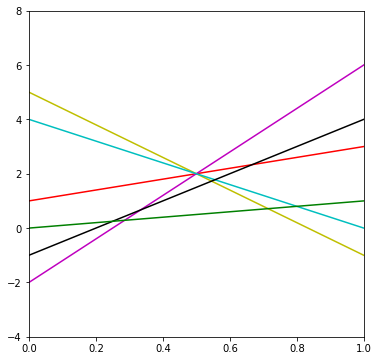

In [21]:
figsize(6, 6)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-4, 8])

colors = ["y-", "r-", "m-", "c-", "k-", "g-"]

for i in range(6):
    plt.plot([0, 1], [M[1, i], M[0, i]], colors[i])
    
plt.show()

Построим график функции $f(x)$ выигрышей игрока 1 как нижнюю огибающую построенных прямых:

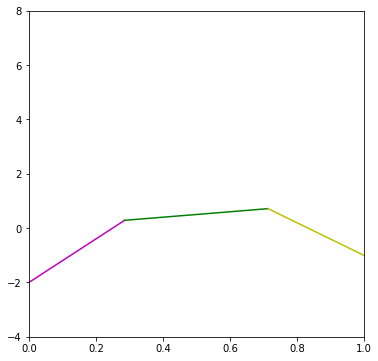

In [38]:
figsize(6, 6)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-4, 8])

plt.plot([0, 2/7], [-2, 2/7], 'm-')
plt.plot([2/7, 5/7], [2/7, 5/7], 'g-')
plt.plot([5/7, 1], [5/7, -1], 'y-')

plt.show()

Найдем точку максимума функции $f(x)$ и вычислим цену игры $\nu(A) = f(x^*)$:

Прямая зеленого цвета задается выражением: $1\cdot x + 0\cdot(1-x)$

Прямая желтого цвета задается выражением: $-1\cdot x + 5 \cdot (1 - x)$

Чтобы найти $x^*$ решим уравнение: $x = -x + 5(1 - x)$

Получаем $x^* = \frac{5}{7}$

И __цена игры__ $\nu(A) = \frac{5}{7}$

__Оптимальная стратегия игрока 1__: $p^* = (x^*, 1 - x^*) = (\frac{5}{7}, \frac{2}{7})$

Графически:

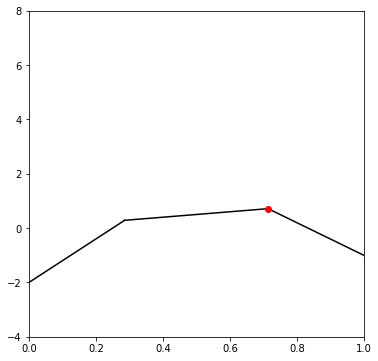

In [25]:
figsize(6, 6)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-4, 8])

plt.plot([0, 2/7], [-2, 2/7], 'k-')
plt.plot([2/7, 5/7], [2/7, 5/7], 'k-')
plt.plot([5/7, 1], [5/7, -1], 'k-')
ax.plot(5/7, 5/7, "or", color = 'r')

plt.show()

Выберем две непараллельные линии, которые пересекаются в точке $x^*$:

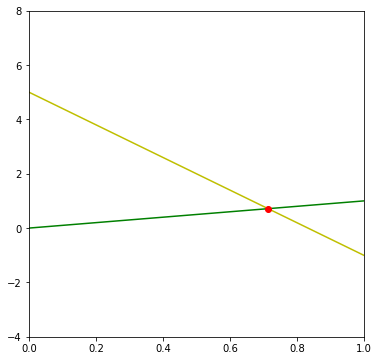

In [43]:
figsize(6,6)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-4, 8])

for i in [0, 5]:
    plt.plot([0, 1], [M[1, i], M[0, i]], colors[i])
ax.plot(5/7, 5/7, 'or', color = 'r')
plt.show()

Составим усеченную матрицу из столбцов, соответствующих выбранным пересекающимся прямым:

\begin{equation*}
A' = 
    \begin{bmatrix}
        -1 & 1\\
        5 & 0
    \end{bmatrix}
\end{equation*}

$q^*_2 = q^*_3 = q^*_4 = q^*_5 = 0$

Решим полученную усеченную игру 2x2 и получим ненулевые компоненты оптимальной стратегии игрока 2.

$q^*_1$ найдем из уравнения: $-6q^*_1 + (1 - q^*_1) = 0$

Получаем: $q^*_1 = \frac{1}{7}$ и $q^*_6 = \frac{6}{7}$

В итоге __оптимальная стратегия второго игрока__: $q^* = (\frac{1}{7}, 0, 0, 0, 0, \frac{6}{7})$

--------
__Решение с помощью `cvxopt`__

Найти цену игры и пару равновесных смешанных стратегий, решив пару соответствующих задач линейного программирования, используя библиотеку `cvxopt`

In [4]:
from cvxopt import matrix, solvers, sparse

In [97]:
A = matrix([[1., -3, -6, 0, -4, -1],
            [-5, -1, 2, -4, 1, 0]])
b = matrix([-1.]*6)
c = matrix([1.]*2)

In [98]:
slv = solvers.lp(c, A, b, solver = 'glpk')

In [99]:
print(slv['x'])

[ 1.00e+00]
[ 4.00e-01]



In [100]:
gp = 1/slv['primal objective']
print('game price:', gp)

game price: 0.7142857142857141


In [101]:
p = gp * slv['x']
print('I player optimal strategy:\n', p, sep = '')

I player optimal strategy:
[ 7.14e-01]
[ 2.86e-01]



In [102]:
B = A.trans()
q = matrix(np.eye(6))
h = matrix(np.zeros((6, 1)))
h = sparse([[c, h]])
h = matrix(h, (8, 1), 'd')
B = sparse([B, q])

In [103]:
slv = solvers.lp(b, -B, h, solver = 'glpk')

In [104]:
print(slv['x'])

[ 2.00e-01]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.20e+00]



In [105]:
gp = -1/slv['primal objective']
print('game price: ', gp)

game price:  0.7142857142857143


In [106]:
q = gp * slv['x']
print('II player optimal strategy:\n', q, sep = '')

II player optimal strategy:
[ 1.43e-01]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 8.57e-01]



--------------------

### Задание 5

Пусть в игре 3 дано: $m = 10, P = 20, N = 10, \beta_i = 1$ и $\sigma = (2, 6, 5, 8, 3, 9, 5, 6, 7, 3)$.

Найти цену игры и пару равновесных чистых стратегий.

$$\log (1 + \frac{\beta_i p_i}{\sigma_i + n_i})$$

#### Метод Франк-Вульфа


In [2]:
from scipy.optimize import line_search, minimize_scalar

def Frank_Wolfe(x0, grad, arg_min, max_iter=5000):
    x = x0.copy()
    k = 0
    r = grad(x)
    s = np.asarray(argmin(r))
    d = np.sum(r*(x - s))
    
    while d > 1e-3 and k < max_iter:
        r = grad(x)
        s = np.asarray(argmin(r))
        d = np.sum(r * (x - s))
        p = s - x
        alpha = 2./(k + 2)
        x = x + alpha * p
        k = k + 1

    return x   

In [3]:
m = 10
sigma = np.array([[2,6,5,8,3,9,5,6,7,3]])
sigma = sigma.T
x = np.random.randn(2*m, 1)

def L(x):
    p = x[0:m]
    n = x[m:2*m]
    return -np.sum(np.log(1+(p/(sigma + n))))

def L_grad(x):
    p = x[0:m]
    n = x[m:2*m]
    grad_p = np.zeros((m,1))
    for i in range(m):
        grad_p[i] = -1/((p[i] + sigma[i] + n[i])*(sigma[i] + n[i]))
    
    grad_n = np.zeros((m,1))
    for i in range(m):
        grad_n[i] = -p[i]/((p[i] + sigma[i] + n[i])*(sigma[i] + n[i]))
    
    grad = np.vstack((grad_p,grad_n))
    return grad

In [4]:
def argmin(grad):
    m = 10
    P = 20
    N = 10
    G = -np.eye(2*m)
    h = np.zeros((2*m, 1))

    A1 = np.hstack((np.ones(m),np.zeros(m)))
    A2 = np.hstack((np.zeros(m),np.ones(m)))
    A = np.vstack((A1,A2))
    b = np.vstack((P,N))

    c = matrix(grad, tc='d')
    G = matrix(G, tc='d')
    h = matrix(h, tc='d')
    A = matrix(A, tc='d')
    b = matrix(b, tc='d')

    z = solvers.lp(c, G, h, A, b)['x']
    return z

In [5]:
x0 = np.random.randn(2*m, 1)
x = Frank_Wolfe(x0, L_grad, argmin, max_iter = 100)

In [6]:
p = x[0:m]
n = x[m:2*m]
print("Strategies:", p, n, sep="\n\n",)
print("\n Game price:", -L(x))

Strategies:

[[3.67920792e+00]
 [2.01782355e+00]
 [2.94455418e+00]
 [8.53618899e-10]
 [3.35841584e+00]
 [6.01878925e-10]
 [2.94851178e+00]
 [1.90297192e+00]
 [4.52547068e-09]
 [3.14851480e+00]]

[[3.64554455e+00]
 [1.83433608e-10]
 [5.60396042e-01]
 [6.08012901e-11]
 [2.48118812e+00]
 [6.08012872e-11]
 [6.57425744e-01]
 [1.90729675e-10]
 [6.08012620e-11]
 [2.65544555e+00]]

 Game price: 2.8321581034884713


--------------

__Решение с помощью экстраградиентного метода__

Сформулировать задачу как вариационное неравенство. Оценить постоянную Липшица $L$, необходимую для определения шага $\lambda_k$, следующим образом: сгенерировать большое количество случайных пар точек $(x_i, y_i)$, принадлежащих множеству допустимых решений, найти $L = \underset{i}{\max} \frac{\|F(y_i) - F(x_i)\|}{\|y_i - x_i\|}$

В качестве критерия остановки использовать $\|x_{k+1} - x_k\| < 10^{-5}$

Имеем задачу:

$$\underset{p}{\max} \underset{n}{min} \sum_{i = 1}^m \log (1 + \frac{\beta_i p_i}{\sigma_i + n_i})$$
$$\mathrm{s.t.}\quad 1^Tp = P$$
$$1^Tn = N$$
$$p_i \geq 0, n_i \geq 0$$

Вариационное неравенство:

$$F(x_*)^T(y - x_*) \geq 0, \forall y \in K_z$$

где

$$F: \quad K_z \rightarrow \mathbb{R}^{2m}$$
\begin{equation*}
    z =
    \begin{pmatrix}
    p\\
    n
    \end{pmatrix}
\end{equation*}
\begin{equation*}
A =
\begin{pmatrix}
    1 & \dots & 1 & 0 & \dots & 0\\
    0 & \dots & 0 & 1 & \dots & 1
\end{pmatrix}
; b =
\begin{pmatrix}
P\\
N
\end{pmatrix}
\end{equation*}


$$K_z = \{z: Az = b, z_i \geq 0\}$$


\begin{equation*}
   F(z)
    \begin{bmatrix}
    \nabla_p L(p, n)\\
    -\nabla_n L(p, n)
    \end{bmatrix}
\end{equation*}

$$L(p, n) = - \sum_{i = 1}^m \log (1 + \frac{\beta_ip_i}{\sigma_i + n_i})$$

In [7]:
def projection(v):
    p = v[0:m].reshape(m,)
    n = v[m:2*m].reshape(m,)
    p_proj = euclidean_proj_simplex(p, P)
    n_proj = euclidean_proj_simplex(n, N)
    return np.hstack((p_proj, n_proj))

In [15]:
m = 10
sigma = np.array([[2,6,5,8,3,9,5,6,7,3]]).T

def F(x):
    p = x[0:m]
    n = x[m:2*m]
    grad_p = np.zeros((m,1))
    for i in range(m):
        grad_p[i] = -1/((p[i] + sigma[i] + n[i])*(sigma[i] + n[i]))
    
    grad_n = np.zeros((m,1))
    for i in range(m):
        grad_n[i] = -p[i]/((p[i] + sigma[i] + n[i])*(sigma[i] + n[i]))
    
    grad = np.vstack((grad_p,grad_n))
    return grad

k = 10**3
x_ = np.zeros((k, 2*m))
y_ = np.zeros((k, 2*m))
P = 20; N = 10

for i in range(k):
    p = np.random.randn(m,)
    n = np.random.randn(m,)
    p_proj = euclidean_proj_simplex(p, P)
    n_proj = euclidean_proj_simplex(n, N)
    x_[i] = np.hstack((p_proj, n_proj))
    
for i in range(k):
    p = np.random.randn(m,)
    n = np.random.randn(m,)
    p_proj = euclidean_proj_simplex(p, P)
    n_proj = euclidean_proj_simplex(n, N)
    y_[i] = np.hstack((p_proj, n_proj))

L1 = np.zeros((k, 1))

for i in range(k):
    L1[i] = np.max((norm(F(y_[i,:])-F(x_[i,:])))/(norm(y_[i,:]-x_[i,:])))

L = np.max(L1)

print("Lipschitz constant estimation =", L)
L_const = L

F = Operator(F, L_const)

Lipschitz constant estimation = 0.05683733507286498


In [16]:
def extragradient(F, x0, proj):
    max_iter = 10**6
    alpha = 1./(F.lipschitz_constant() + 1e-2)
    x = x0.copy()
    is_converged = False
    for k in range(max_iter):
        z = proj(x - alpha*F(x).reshape(2*m,))
        x = proj(x - alpha*F(z).reshape(2*m,))
        if norm(x-z)/norm(x) < 1e-8:
            is_converged = True
            break
    if is_converged:
        print('Converged!')
    else:
        print('Not converged!')
    return x

In [17]:
def L(x):
    p = x[0:m]
    n = x[m:2*m]
    return -np.sum(np.log(1 + (p/(sigma + n))))

In [19]:
x0 = np.random.rand(2*m,)
res = extragradient(F, x0, projection)
x = np.asarray(res).reshape(2*m, 1)
print("Strategies:", x[:m],x[m:],sep="\n\n")
print("\n Game price:", -L(x))

Converged!
Strategies:

[[3.13784917]
 [2.15536322]
 [3.13784917]
 [0.        ]
 [3.13784917]
 [0.        ]
 [3.13784917]
 [2.15539095]
 [0.        ]
 [3.13784917]]

[[3.6]
 [0. ]
 [0.6]
 [0. ]
 [2.6]
 [0. ]
 [0.6]
 [0. ]
 [0. ]
 [2.6]]

 Game price: 2.838323364950579
